In [ ]:
!pip install category_encoders
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.preprocessing import TargetEncoder
from category_encoders import TargetEncoder
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
# Load data
data = pd.read_csv('datathon4.csv')

# Inspect the first three rows of the data
data.head(10)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.56,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.45,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,50129,33,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,90749,118,0,50.0,25.71,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [ ]:
# Print the dimension of the dataset
print(data.shape)

(91713, 186)


In [ ]:
pd.set_option('display.max_rows', None)
print(data.dtypes)

encounter_id                       int64
patient_id                         int64
hospital_id                        int64
hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache      

In [ ]:
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
pd.set_option('display.max_rows', None)
missing_value_counts = data.isnull().sum()
missing_value_counts

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [ ]:
data['hospital_death'].unique()

array([0, 1])

In [ ]:
data['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
import plotly.express as px

# Compute the count of each class in the 'target' column
counts = data['hospital_death'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "target"',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Hospital Deaths'
    ),
    title=dict(
        text='Distribution of Classes in "Hospital Deaths"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

In [ ]:
selected_columns = ['hospital_death', 'age', 'gender', 'bmi', 'aids', 'cirrhosis',
                    'diabetes_mellitus', 'hepatic_failure', 'immunosuppression',
                    'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
subset_data = data[selected_columns]

In [ ]:
missing_value_counts = subset_data.isnull().sum()
missing_value_counts

hospital_death                    0
age                            4228
gender                           25
bmi                            3429
aids                            715
cirrhosis                       715
diabetes_mellitus               715
hepatic_failure                 715
immunosuppression               715
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
dtype: int64

In [ ]:
subset_data['aids'].unique()

array([ 0., nan,  1.])

In [ ]:
subset_data['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
subset_data['cirrhosis'].unique()

array([0., 1.])

In [ ]:
subset_data['diabetes_mellitus'].unique()

array([1., 0.])

In [ ]:
subset_data['hepatic_failure'].unique()

array([0., 1.])

In [ ]:
subset_data['immunosuppression'].unique()

array([0., 1.])

In [ ]:
subset_data['leukemia'].unique()

array([0., 1.])

In [ ]:
subset_data['lymphoma'].unique()

array([0., 1.])

In [ ]:
subset_data['solid_tumor_with_metastasis'].unique()

array([0., 1.])

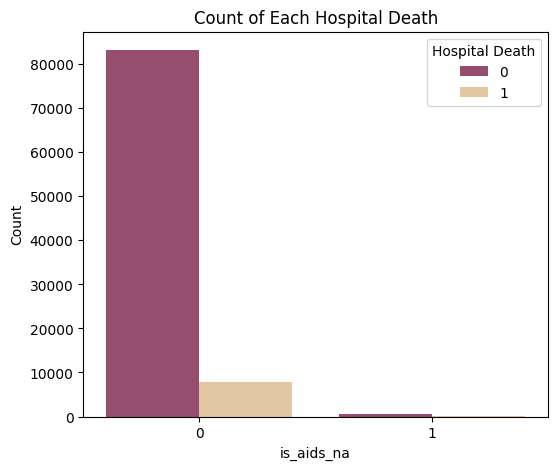

is_aids_na
0    90998
1      715
Name: hospital_death, dtype: int64


In [ ]:
subset_data['is_aids_na'] = subset_data['aids'].isna().astype(int)

# Convert the 'Class/ASD' column to string subset_data type
subset_data['hospital_death'] = subset_data['hospital_death'].astype(str)

# Create a grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=subset_data, x='is_aids_na', hue='hospital_death', palette=colors)

# Set labels and title for the plot
plt.xlabel('is_aids_na')
plt.ylabel('Count')
plt.title('Count of Each Hospital Death')
plt.legend(title='Hospital Death')
plt.show()

# Convert the 'Class/ASD' column back to integer subset_data type
subset_data['hospital_death'] = subset_data['hospital_death'].astype(int)

# Calculate the mean of 'Class/ASD' grouped by 'is_ethnicity_na' and print the result
print(subset_data.groupby('is_aids_na')['hospital_death'].count())

# Remove the 'is_ethnicity_na' column from the subset_dataFrame
subset_data.drop('is_aids_na', axis=1, inplace=True)

In [ ]:
subset_data.dropna(subset=['aids'], inplace=True)
missing_value_counts = subset_data.isnull().sum()
missing_value_counts

hospital_death                    0
age                            3501
gender                            0
bmi                            3391
aids                              0
cirrhosis                         0
diabetes_mellitus                 0
hepatic_failure                   0
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
dtype: int64

In [ ]:
subset_data.dropna(subset=['gender'], inplace=True)
missing_value_counts = subset_data.isnull().sum()
missing_value_counts

hospital_death                    0
age                            3501
gender                            0
bmi                            3391
aids                              0
cirrhosis                         0
diabetes_mellitus                 0
hepatic_failure                   0
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
dtype: int64

In [ ]:
print(subset_data.shape)

(90973, 12)


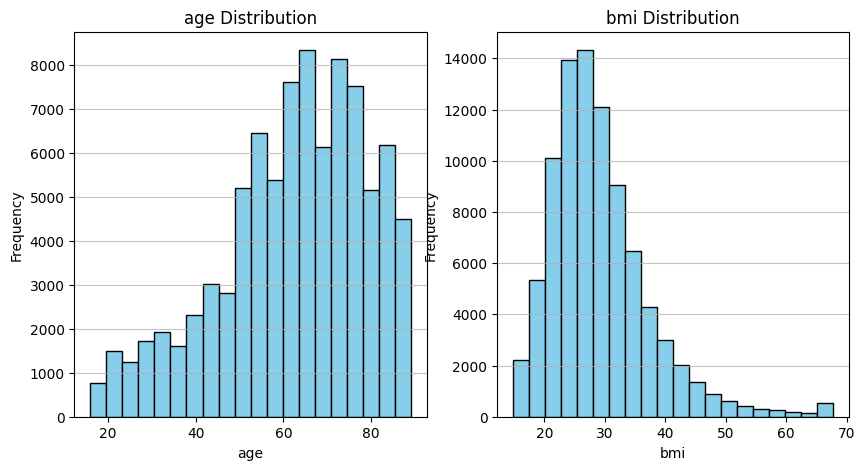

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the list of column names (excluding non-numeric columns)
numerical_columns = ['age','bmi']
num_columns_per_row = 2
num_rows = 1

# Create a grid of histograms
fig, axes = plt.subplots(num_rows, num_columns_per_row, figsize=(10, 5))
fig.subplots_adjust(hspace=0.8)

for i, column in enumerate(numerical_columns):  # Access column names
    row = i // num_columns_per_row
    col = i % num_columns_per_row

    ax = axes[col]  # Swap row and col indices
    ax.hist(subset_data[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.75)

plt.show()

In [ ]:
print(subset_data[numerical_columns].describe())

                age           bmi
count  87472.000000  87582.000000
mean      62.312020     29.181466
std       16.773258      8.269976
min       16.000000     14.844926
25%       52.000000     23.641991
50%       65.000000     27.651163
75%       75.000000     32.923829
max       89.000000     67.814990


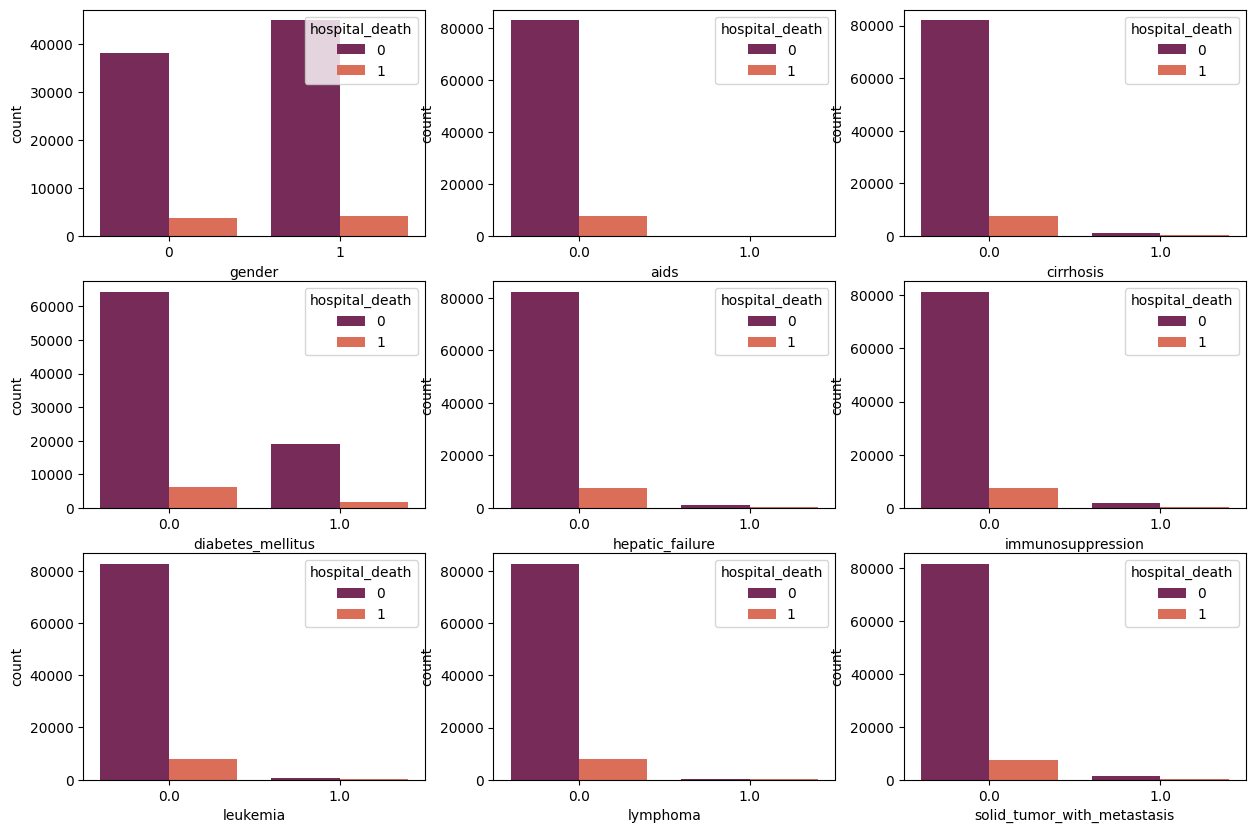

In [ ]:
subset_data['gender'] = subset_data['gender'].replace({'M': 1, 'F': 0})

categorical_columns = ["gender","aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure",
                       "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]
target_column = "hospital_death"

# Checking the difference in the distribution of categorical features across two classes

# Initialize a 3x3 grid of subplots
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))

# Loop through each categorical column to plot its distribution
for i, column in enumerate(categorical_columns):
    # Determine the subplot's position based on the current index
    x = i // 3
    y = i % 3

    # Create a count plot for the current column
    # The hue parameter divides the counts based on the 'target' column,
    # allowing for a comparison between the classes.
    sns.countplot(data=subset_data, x=column, hue='hospital_death', palette='rocket', ax=axs[x][y])

# Display all the plots
plt.show()

<Axes: >

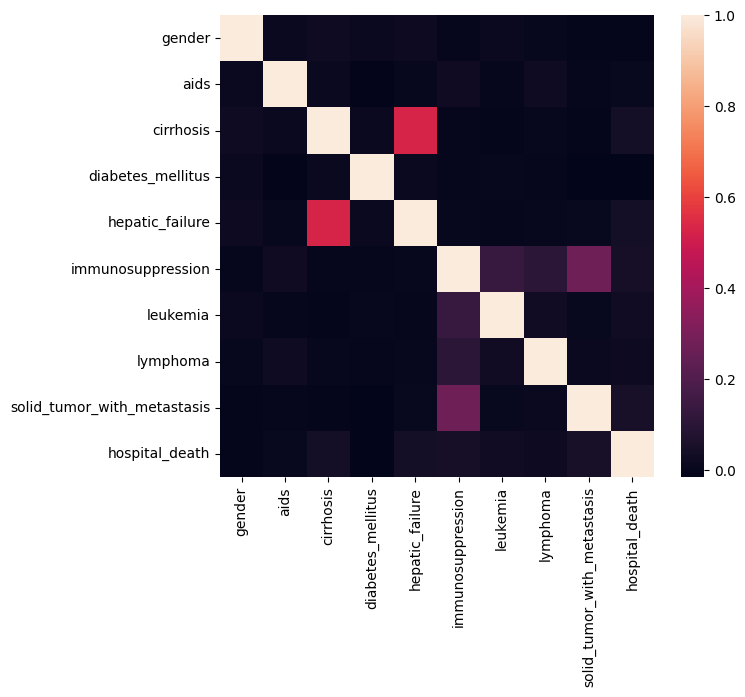

In [ ]:
subset_data['gender'] = subset_data['gender'].replace({'M': 1, 'F': 0})

categorical_columns = ["gender","aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure",
                       "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]
target_column = "hospital_death"

plt.figure(figsize=(7,6))
sns.heatmap(subset_data[categorical_columns + [target_column]].corr())

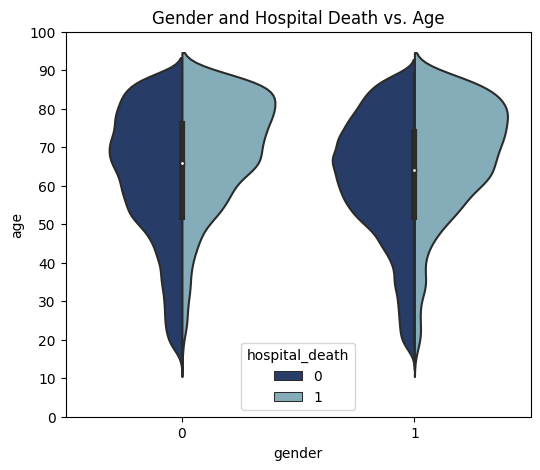

In [ ]:
plt.figure(figsize=(6, 5))
sns.violinplot(x="gender", y="age", hue="hospital_death", data=subset_data, split=True, palette=['#1c3a73', '#7cb1c2'])
plt.title('Gender and Hospital Death vs. Age')
plt.yticks(range(0, 110, 10))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Splitting the original dataset into training, validation, and test sets

# Taking 70% of the data for training
train_df = subset_data.sample(frac = 0.7)

# Removing the training data from the original dataset to get the combined validation and test data
test_df = subset_data.drop(train_df.index)

# Splitting the combined validation and test data into two equal parts for validation and testing, respectively
valid_df = test_df.sample(frac = 0.5)
test_df = test_df.drop(valid_df.index)

# Use SimpleImputer to compute the median of 'age' in the training set
imputer = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.
imputer.fit(train_df[["age"]])

# Use this mean to fill the NaN values in both training, validation, and test sets
train_df["age"] = imputer.transform(train_df[['age']])
valid_df["age"] = imputer.transform(valid_df[['age']])
test_df['age'] = imputer.transform(test_df[['age']])

# Use SimpleImputer to compute the median of 'age' in the training set
imputer1 = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.
imputer1.fit(train_df[["bmi"]])

# Use this mean to fill the NaN values in both training, validation, and test sets
train_df["bmi"] = imputer1.transform(train_df[['bmi']])
valid_df["bmi"] = imputer1.transform(valid_df[['bmi']])
test_df['bmi'] = imputer1.transform(test_df[['bmi']])

In [ ]:
def get_scores(Y, Y_pred):
    """
    Computes various evaluation metrics for model predictions.

    Parameters:
    - Y: Actual target values.
    - Y_pred: Predicted target values by the model.

    Returns:
    - conf_matrix: Confusion matrix showing true positives, true negatives, false positives, and false negatives.
    - class_report: Classification report detailing precision, recall, and F1-score for each class.
    - auc: Area Under the Curve (AUC) value for the model's predictions.
    - acc: Accuracy of the model's predictions.
    """
    conf_matrix = confusion_matrix(Y, Y_pred)
    class_report = classification_report(Y, Y_pred)
    auc = roc_auc_score(Y, Y_pred)
    acc = accuracy_score(Y, Y_pred)

    return conf_matrix, class_report, auc, acc

def print_scores(conf_matrix, class_report, auc, acc):
    """
    Prints the evaluation metrics in a structured format.

    Parameters:
    - conf_matrix: Confusion matrix from get_scores function.
    - class_report: Classification report from get_scores function.
    - auc: AUC value from get_scores function.
    - acc: Accuracy value from get_scores function.
    """
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

======== Training Set ==========
AUC :  0.5000824655533908
Accuracy :  0.9137733389865109
Confusion Matrix:
[[58189     1]
 [ 5490     1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58190
           1       0.50      0.00      0.00      5491

    accuracy                           0.91     63681
   macro avg       0.71      0.50      0.48     63681
weighted avg       0.88      0.91      0.87     63681



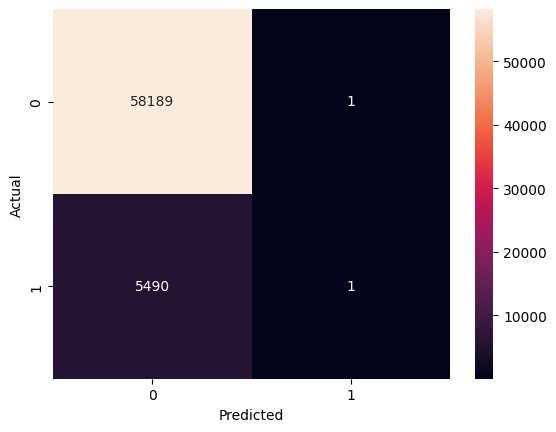

======== Validation Set ==========
AUC :  0.5
Accuracy :  0.9115491719185109
Confusion Matrix:
[[12439     0]
 [ 1207     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12439
           1       0.00      0.00      0.00      1207

    accuracy                           0.91     13646
   macro avg       0.46      0.50      0.48     13646
weighted avg       0.83      0.91      0.87     13646



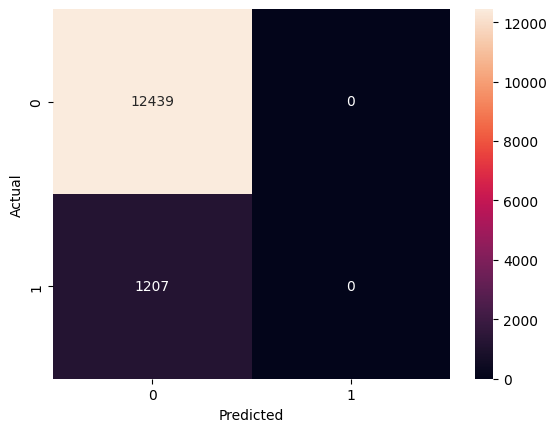

======== Test Set ==========
AUC :  0.4999600702763137
Accuracy :  0.9175582588304265
Confusion Matrix:
[[12521     1]
 [ 1124     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12522
           1       0.00      0.00      0.00      1124

    accuracy                           0.92     13646
   macro avg       0.46      0.50      0.48     13646
weighted avg       0.84      0.92      0.88     13646



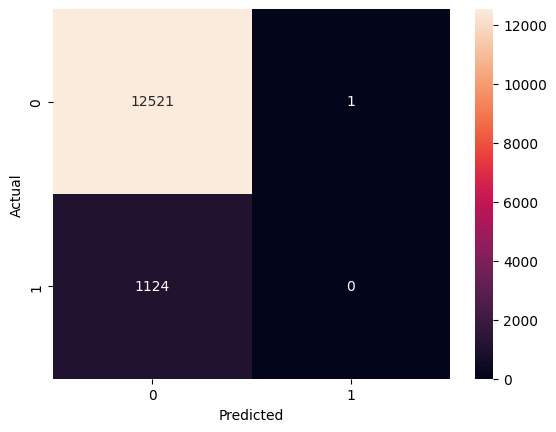

[1.60493069 0.60493069 0.44463491 ... 0.02061072 0.02059553 0.01652955]


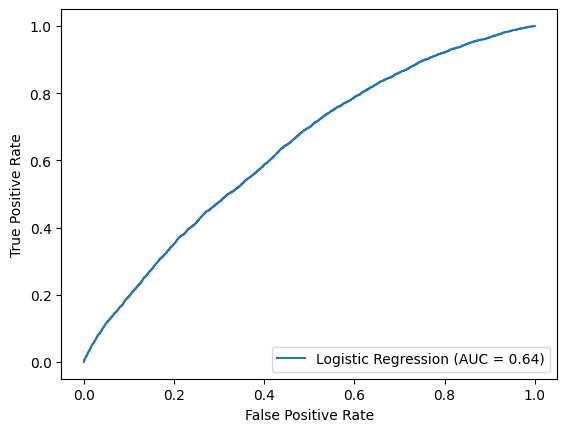

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import numpy as np

# Specify your features and target variable
X = subset_data.drop(['hospital_death'], axis=1)
y = subset_data['hospital_death']

# Split the data into training (70%) and a temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=26)

# Split the temporary set into testing (15%) and validation (15%)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Use SimpleImputer to compute the median of 'age' in the training set
imputer = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.
imputer.fit(X_train[["age"]])

# Use this mean to fill the NaN values in both training, validation, and test sets
X_train["age"] = imputer.transform(X_train[['age']])
X_valid["age"] = imputer.transform(X_valid[['age']])
X_test['age'] = imputer.transform(X_test[['age']])

# Use SimpleImputer to compute the median of 'age' in the training set
imputer1 = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.
imputer1.fit(X_train[["bmi"]])

# Use this mean to fill the NaN values in both training, validation, and test sets
X_train["bmi"] = imputer1.transform(X_train[['bmi']])
X_valid["bmi"] = imputer1.transform(X_valid[['bmi']])
X_test['bmi'] = imputer1.transform(X_test[['bmi']])

# Normalizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test and training sets
y_pred_valid = log_reg.predict(X_valid_scaled)
y_pred_test = log_reg.predict(X_test_scaled)
y_pred_train = log_reg.predict(X_train_scaled)
y_probalities = log_reg.predict_proba(X_train_scaled)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_valid, class_report_valid, auc_valid, acc_valid = get_scores(y_valid, y_pred_valid)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_train, y_pred_train)
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_test, y_pred_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_train, y_pred_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)
sns.heatmap(conf_matrix_train, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print scores and evaluation metrics for the test set
print('======== Validation Set ==========')
print_scores(conf_matrix_valid, class_report_valid, auc_valid, acc_valid)
sns.heatmap(conf_matrix_valid, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_train, y_probalities[:, 1])
print(thresholds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()


======== Training Set ==========
AUC :  0.5948672465612541
Accuracy :  0.5798589846264977
Confusion Matrix:
[[33560 24630]
 [ 2125  3366]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.58      0.71     58190
           1       0.12      0.61      0.20      5491

    accuracy                           0.58     63681
   macro avg       0.53      0.59      0.46     63681
weighted avg       0.87      0.58      0.67     63681



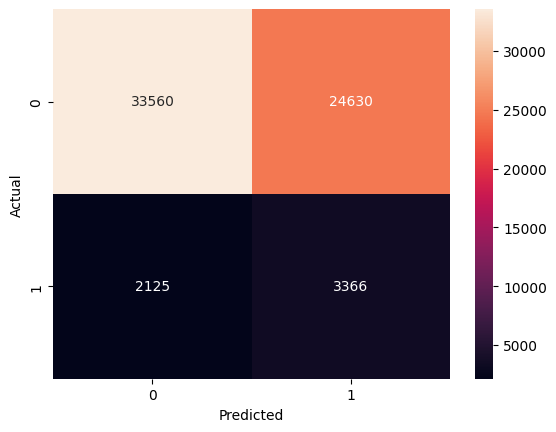

======== Validation Set ==========
AUC :  0.5963806940421036
Accuracy :  0.5792173530704968
Confusion Matrix:
[[7159 5280]
 [ 462  745]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.58      0.71     12439
           1       0.12      0.62      0.21      1207

    accuracy                           0.58     13646
   macro avg       0.53      0.60      0.46     13646
weighted avg       0.87      0.58      0.67     13646



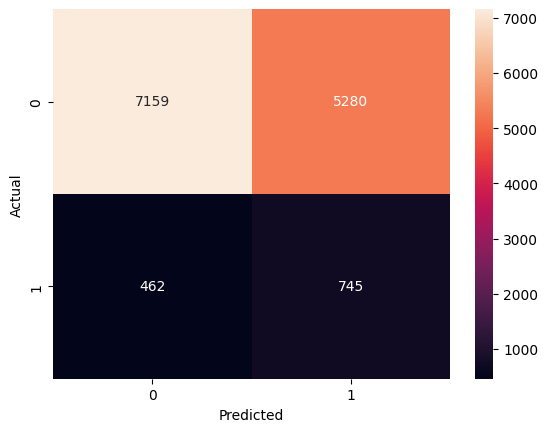

======== Test Set ==========
AUC :  0.5980433866999064
Accuracy :  0.5773853143778397
Confusion Matrix:
[[7179 5343]
 [ 424  700]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.57      0.71     12522
           1       0.12      0.62      0.20      1124

    accuracy                           0.58     13646
   macro avg       0.53      0.60      0.45     13646
weighted avg       0.88      0.58      0.67     13646



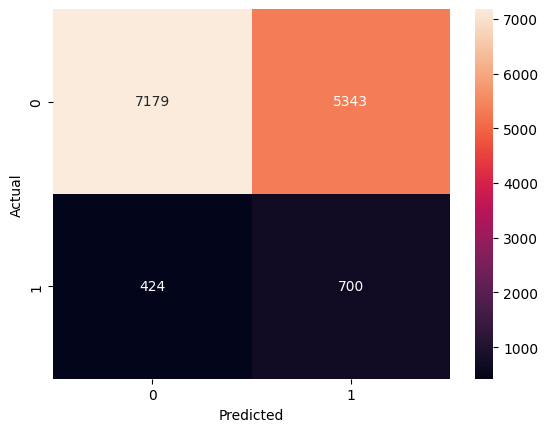

[1.94682991 0.94682991 0.90746201 ... 0.17384936 0.17322906 0.15124719]


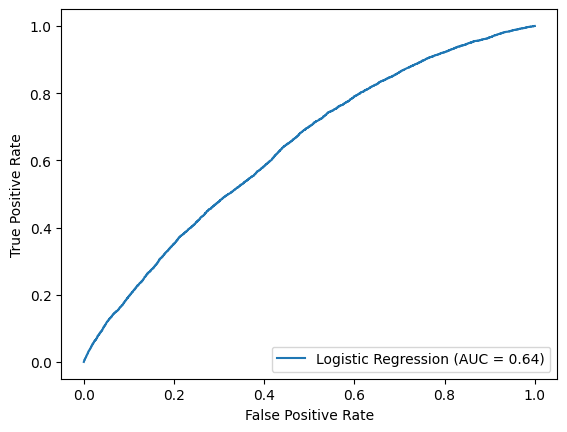

In [ ]:
#### Adding Weights due to Imbalance of Outcome ####

# Specify your features and target variable
X = subset_data.drop(['hospital_death'], axis=1)
y = subset_data['hospital_death']

# Split the data into training (70%) and a temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=26)

# Split the temporary set into testing (15%) and validation (15%)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Use SimpleImputer to compute the median of 'age' in the training set
imputer = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.
imputer.fit(X_train[["age"]])

# Use this mean to fill the NaN values in both training, validation, and test sets
X_train["age"] = imputer.transform(X_train[['age']])
X_valid["age"] = imputer.transform(X_valid[['age']])
X_test['age'] = imputer.transform(X_test[['age']])

# Use SimpleImputer to compute the median of 'age' in the training set
imputer1 = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.
imputer1.fit(X_train[["bmi"]])

# Use this mean to fill the NaN values in both training, validation, and test sets
X_train["bmi"] = imputer1.transform(X_train[['bmi']])
X_valid["bmi"] = imputer1.transform(X_valid[['bmi']])
X_test['bmi'] = imputer1.transform(X_test[['bmi']])

# Normalizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test and training sets
y_pred_valid = log_reg.predict(X_valid_scaled)
y_pred_test = log_reg.predict(X_test_scaled)
y_pred_train = log_reg.predict(X_train_scaled)
y_probalities = log_reg.predict_proba(X_train_scaled)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_valid, class_report_valid, auc_valid, acc_valid = get_scores(y_valid, y_pred_valid)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_train, y_pred_train)
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_test, y_pred_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_train, y_pred_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)
sns.heatmap(conf_matrix_train, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print scores and evaluation metrics for the test set
print('======== Validation Set ==========')
print_scores(conf_matrix_valid, class_report_valid, auc_valid, acc_valid)
sns.heatmap(conf_matrix_valid, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_train, y_probalities[:, 1])
print(thresholds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Separate features and target variable
X = subset_data.drop(['hospital_death'], axis=1)
y = subset_data['hospital_death']

# Add a constant term for the intercept
X = sm.add_constant(X)

imputer = SimpleImputer(strategy='median')
imputer.fit(X[["age"]])
X["age"] = imputer.transform(X[['age']])

imputer1 = SimpleImputer(strategy='median')
imputer1.fit(X[["bmi"]])
X["bmi"] = imputer1.transform(X[['bmi']])

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()


# Coefficients and their standard errors
coefficients = log_reg.params
standard_errors = log_reg.bse

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Calculate 95% CI for odds ratios
lower_bound = np.exp(coefficients - 1.96 * standard_errors)
upper_bound = np.exp(coefficients + 1.96 * standard_errors)

# Print results
for idx, coef in enumerate(log_reg.params.index):
    print(f"For {coef}: Odds Ratio: {odds_ratios[idx]:.4f}, 95% CI: ({lower_bound[idx]:.4f}, {upper_bound[idx]:.4f})")

# calculate specific OR for age difference of 10 years
odds_ratios = np.exp(10 * coefficients['age'])  # Adjust for a 10-year difference

# Calculate 95% CI for odds ratios
lower_bound = np.exp(10 * (coefficients['age'] - 1.96 * standard_errors['age']))
upper_bound = np.exp(10 * (coefficients['age'] + 1.96 * standard_errors['age']))
print(f"For a 10-year difference in Age: Odds Ratio: {odds_ratios:.4f}, 95% CI: ({lower_bound:.4f}, {upper_bound:.4f})")

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.283775
         Iterations 7
For const: Odds Ratio: 0.0184, 95% CI: (0.0157, 0.0215)
For age: Odds Ratio: 1.0278, 95% CI: (1.0261, 1.0295)
For gender: Odds Ratio: 0.9647, 95% CI: (0.9204, 1.0112)
For bmi: Odds Ratio: 0.9942, 95% CI: (0.9910, 0.9974)
For aids: Odds Ratio: 2.1028, 95% CI: (1.0643, 4.1547)
For cirrhosis: Odds Ratio: 2.0205, 95% CI: (1.6937, 2.4103)
For diabetes_mellitus: Odds Ratio: 0.8364, 95% CI: (0.7886, 0.8871)
For hepatic_failure: Odds Ratio: 1.7752, 95% CI: (1.4675, 2.1475)
For immunosuppression: Odds Ratio: 1.5453, 95% CI: (1.3666, 1.7474)
For leukemia: Odds Ratio: 1.9041, 95% CI: (1.5488, 2.3408)
For lymphoma: Odds Ratio: 1.5697, 95% CI: (1.1883, 2.0734)
For solid_tumor_with_metastasis: Odds Ratio: 2.0394, 95% CI: (1.7948, 2.3172)
For a 10-year difference in Age: Odds Ratio: 1.3151, 95% CI: (1.2933, 1.3374)
                           Logit Regression Results                           
Dep. Va

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import plotly.express as px
import numpy as np
import warnings
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

In [ ]:
numerical_columns = ['age','bmi']
categorical_columns = ["gender","aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure",
                       "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]
target_column = "hospital_death"

In [ ]:
# Splitting the original dataset into training, validation, and test sets

# Taking 70% of the data for training
train_df = subset_data.sample(frac = 0.7, random_state = 26)

# Removing the training data from the original dataset to get the combined validation and test data
test_df = subset_data.drop(train_df.index)

# Splitting the combined validation and test data into two equal parts for validation and testing, respectively
valid_df = test_df.sample(frac = 0.5)
test_df = test_df.drop(valid_df.index)

# Use SimpleImputer to compute the median of 'age' in the training set
imputer = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.
imputer.fit(train_df[["age"]])

# Use this mean to fill the NaN values in both training, validation, and test sets
train_df["age"] = imputer.transform(train_df[['age']])
valid_df["age"] = imputer.transform(valid_df[['age']])
test_df['age'] = imputer.transform(test_df[['age']])

# Use SimpleImputer to compute the median of 'age' in the training set
imputer1 = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.
imputer1.fit(train_df[["bmi"]])

# Use this mean to fill the NaN values in both training, validation, and test sets
train_df["bmi"] = imputer1.transform(train_df[['bmi']])
valid_df["bmi"] = imputer1.transform(valid_df[['bmi']])
test_df['bmi'] = imputer1.transform(test_df[['bmi']])

In [ ]:
!pip install imbalanced-learn

#Resampling using SMOTE and do the Navie Bayes again
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
pip install imbalanced-learn

#Resampling using SMOTE and do the Navie Bayes again
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# Split the data into training (70%) and a temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=26)

# Split the temporary set into testing (15%) and validation (15%)
#X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Bernoulli Naive Bayes classifier
clf = BernoulliNB()

# Train the classifier on the resampled training data
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import numpy as np
# Splitting the original dataset into training, validation, and test sets
# Separate features and target variable
X = subset_data.drop(['hospital_death'], axis=1)
y = subset_data['hospital_death']
# Split the data into training (70%) and a temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=26)

# Split the temporary set into testing (15%) and validation (15%)
#X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
#fill na with median value
X_train['age'].fillna(X_train['age'].median(), inplace=True)
X_train['bmi'].fillna(X_train['bmi'].median(), inplace=True)


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Gaussian Naive Bayes model for numerical columns
gnb = GaussianNB()
gnb = gnb.fit(X_train_resampled, y_train_resampled)

# Train a Categorical Naive Bayes model for categorical columns
cnb = CategoricalNB()
cnb = cnb.fit(X_train_resampled, y_train_resampled)

# Bernoulli
#bnb = BernoulliNB()


# Get joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(X_train_resampled)
cnb_log_pred = cnb.predict_joint_log_proba(X_train_resampled)

# Combine the log probabilities, adjusting for the multiplication of P(Y) term
y_hat_prob = gnb_log_pred + cnb_log_pred  - cnb.class_log_prior_

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model using custom functions
conf_matrix, class_report, auc, acc = get_scores(y_train_resampled, y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_train_resampled, y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#9325c2')

AUC :  0.6153158163725462
Accuracy :  0.6153158163725461
Confusion Matrix:
[[41277 25249]
 [25934 40592]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.62      0.62     66526
           1       0.62      0.61      0.61     66526

    accuracy                           0.62    133052
   macro avg       0.62      0.62      0.62    133052
weighted avg       0.62      0.62      0.62    133052



ValueError: ignored

AUC :  0.5
Accuracy :  0.9144071522790561
Confusion Matrix:
[[12478     0]
 [ 1168     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     12478
           1       0.00      0.00      0.00      1168

    accuracy                           0.91     13646
   macro avg       0.46      0.50      0.48     13646
weighted avg       0.84      0.91      0.87     13646



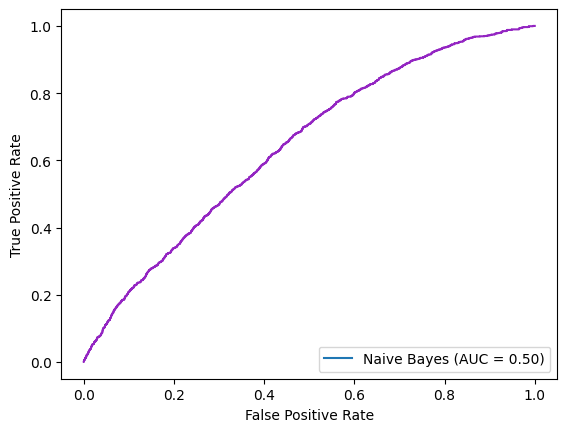

In [ ]:
# Predict the joint log probabilities for each model on validation data
gnb_log_pred = gnb.predict_joint_log_proba(valid_df[numerical_columns])
cnb_log_pred = cnb.predict_joint_log_proba(valid_df[categorical_columns])

# Combine the log probabilities, adjusting for the multiplication of P(Y) term
y_hat_prob = gnb_log_pred + cnb_log_pred + cnb.class_log_prior_

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels for validation data
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model on validation data using custom functions
conf_matrix, class_report, auc, acc = get_scores(valid_df[target_column], y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Plot the ROC curve for validation data
fpr, tpr, thresholds = roc_curve(valid_df[target_column], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#9325c2')

AUC :  0.5
Accuracy :  0.9122819873955738
Confusion Matrix:
[[12449     0]
 [ 1197     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12449
           1       0.00      0.00      0.00      1197

    accuracy                           0.91     13646
   macro avg       0.46      0.50      0.48     13646
weighted avg       0.83      0.91      0.87     13646



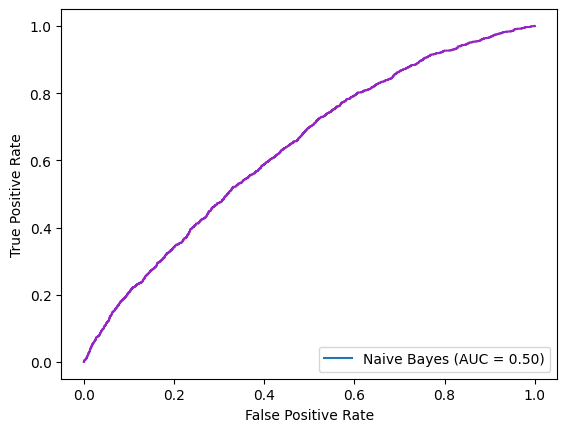

In [ ]:
# Getting joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(test_df[numerical_columns])
cnb_log_pred = cnb.predict_joint_log_proba(test_df[categorical_columns])

# Combine the log probabilities
y_hat_prob = gnb_log_pred + cnb_log_pred + cnb.class_log_prior_

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model on test data using custom functions
conf_matrix, class_report, auc, acc = get_scores(test_df[target_column], y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Plot the ROC curve for test data
fpr, tpr, thresholds = roc_curve(test_df[target_column], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#9325c2')